In [2]:
start_date="2021-01-01"

In [3]:
import sys
sys.path.append('/Users/chakbong/Desktop')
sys.path.append('/Users/chakbong/Desktop/Functions')
from Functions import picky

ModuleNotFoundError: No module named 'Functions'

In [4]:
import quandl
from datetime import date
raw_yield = quandl.get("USTREASURY/YIELD", start_date=start_date, end_date=date.today())
CPI = quandl.get("RATEINF/CPI_USA", start_date=start_date, end_date=date.today())

In [5]:
import yfinance as yf
ticker = ['GLD','^HUI']#'^HUI'
gold = yf.download( ticker , interval = "1d", period = "2mo")
fx = yf.download( ['HKDCNY=X','USDCNY=X'] , interval = "1d", period = "6mo")

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed



Date
2021-01-04    0.93
2021-01-05    0.96
2021-01-06    1.04
2021-01-07    1.08
2021-01-08    1.13
              ... 
2022-08-22    3.03
2022-08-23    3.05
2022-08-24    3.11
2022-08-25    3.03
2022-08-26    3.04
Name: 10 YR, Length: 415, dtype: float64               Value
Date               
2021-01-31  261.582
2021-02-28  263.014
2021-03-31  264.877
2021-04-30  267.054
2021-05-31  269.195
2021-06-30  271.696
2021-07-31  273.003
2021-08-31  273.567
2021-09-30  274.310
2021-10-31  276.589
2021-11-30  277.948
2021-12-31  278.802
2022-01-31  281.148
2022-02-28  283.716
2022-03-31  287.504
2022-04-30  289.109
2022-05-31  292.296
2022-06-30  296.311
2022-07-31  296.276


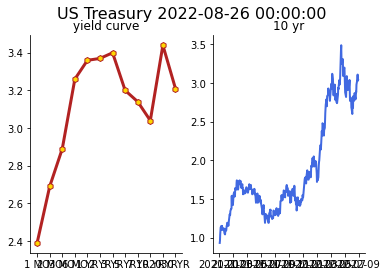

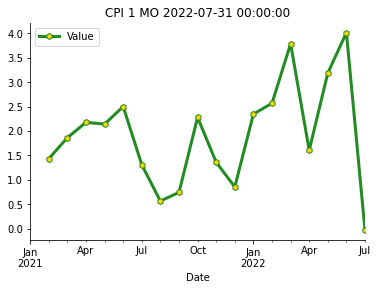

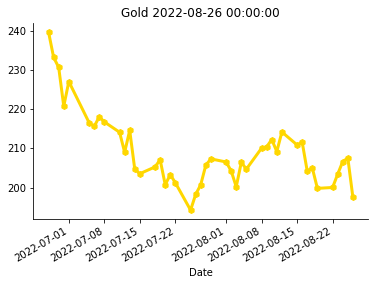

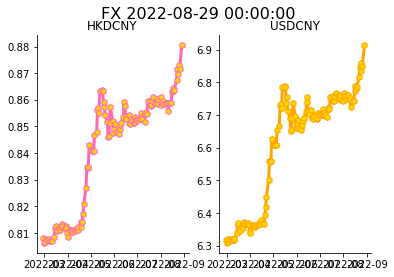

In [6]:
import matplotlib.pyplot as plt

lwd=3

fig, axarr = plt.subplots(1, 2)
fig.suptitle("US Treasury %s" % raw_yield.index[-1], fontsize=16)
axarr[0].plot(raw_yield.iloc[-1,:], color='firebrick', linewidth=lwd, marker='h', markerfacecolor='gold')
axarr[1].plot(raw_yield['10 YR'], color='royalblue', linewidth=lwd-1)
axarr[0].set_title('yield curve')
axarr[1].set_title('10 yr')

CPI_graph = CPI.diff(periods = 1).plot(title='CPI 1 MO %s' % CPI.index[-1], color='forestgreen', linewidth=lwd,
                                       marker='h', markerfacecolor='gold')

f1 = plt.figure()
f1.axis=gold['Adj Close']['^HUI'].plot(title='Gold %s' % gold.index[-1], color='gold', linewidth=lwd,
                                       marker='h', markerfacecolor='gold')


fig_fx, axarr_fx = plt.subplots(1, 2)
fig_fx.suptitle("FX %s" % fx.index[-1], fontsize=16)
axarr_fx[0].plot(fx['Adj Close']['HKDCNY=X'],  color='hotpink', linewidth=lwd,
                                       marker='h', markerfacecolor='gold')
axarr_fx[0].set_title('HKDCNY')

axarr_fx[1].plot(fx['Adj Close']['USDCNY=X'],  color='orange', linewidth=lwd,
                                       marker='h', markerfacecolor='gold')
axarr_fx[1].set_title('USDCNY')

frame= ['top', 'right']
graphs = [axarr[0],axarr[1],axarr_fx[0],axarr_fx[1],CPI_graph, f1.axis]
[i.spines[j].set_visible(False) for i in graphs for j in frame]
print('')
print(raw_yield['10 YR'],CPI)

In [6]:
import urllib
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

root = "https://www.google.com/"
url = "https://google.com/search?q="
query = 'us treasury yield'
query =urllib.parse.quote_plus(query)
link = url + query
print(f'Main link to search for: {link}')


options = Options()
# options.headless = True
options.add_argument("--window-size=1920,1200")
driver = webdriver.Safari(options=options)
driver.get(link)
wait = WebDriverWait(driver, 50)
wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[@class = "g"]')))
headings = driver.find_elements_by_xpath('//div[@class = "g"]')  # Heading elements


for heading in headings:

    title = heading.find_elements_by_tag_name('h3')
    links = heading.find_element_by_css_selector('.yuRUbf>a').get_attribute("href")  # This ain't working either, any help?
    print(links)
    # link = heading.find_element_by_name('a href')
    for t in title:
        print('title:', t.text)
# driver.close()

Main link to search for: https://google.com/search?q=us+treasury+yield
https://www.bloomberg.com/markets/rates-bonds/government-bonds/us
title: United States Rates & Bonds - Bloomberg
https://www.cnbc.com/quotes/US10Y
title: US10Y: US 10 Year Treasury - Stock Price, Quote and News
title: Bonds & Rates - CNBC


/Users/chakbong/opt/anaconda3/lib/python3.8/site-packages/selenium/webdriver/remote/webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
/Users/chakbong/opt/anaconda3/lib/python3.8/site-packages/selenium/webdriver/remote/webelement.py:484: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


In [207]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium import webdriver
driver = webdriver.Safari(options=options)
driver.get('https://www.marketwatch.com/investing/bond/tmubmusd10y?countrycode=bx')
driver.close()


<ipython-input-207-665e2196b883>:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_tag_name('body').send_keys(Keys.COMMAND + 't')


AttributeError: 'WebDriver' object has no attribute 'findElement'